# КВБО-01-21 Марченко Сергей

# 1
## Представьте собственные данные и постройте эктраполяцию полиномами первой, второй и третьей степени.

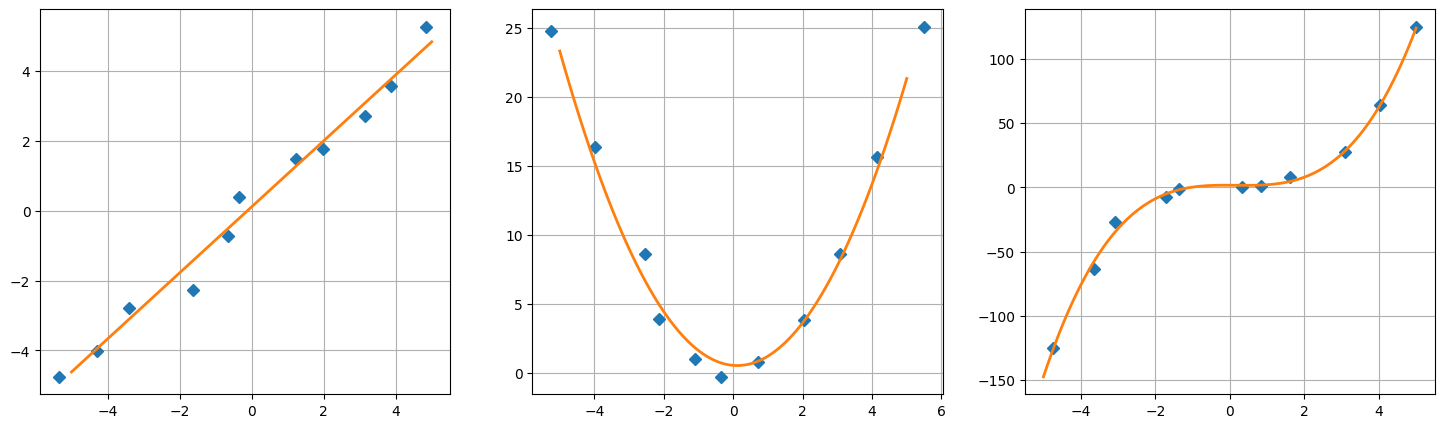

In [4]:
import matplotlib.pyplot as plt
from numpy import *
from numpy.random import *

delta = 1.0
sample_size = 11
x_prec = linspace(-5, 5, 101)
plt.figure(figsize=(18, 5))
rng = default_rng()

# First order
x = linspace(-5, 5, sample_size)
y = x + delta * (rng.random(sample_size) - .5)
x += delta * (rng.random(sample_size) - 0.5)

m = vstack([x, ones(sample_size)]).T
s = linalg.lstsq(m, y, rcond=None)[0]

plt.subplot(131)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec + s[1], '-', lw=2)
plt.grid()

# Second order
x = linspace(-5, 5, sample_size)
y = x ** 2 + delta * (rng.random(sample_size) - .5)
x += delta * (rng.random(sample_size) - 0.5)

m = vstack([x ** 2, x, ones(sample_size)]).T
s = linalg.lstsq(m, y, rcond=None)[0]

plt.subplot(132)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec ** 2 + s[1] * x_prec + s[2], '-', lw=2)
plt.grid()

# Third order
x = linspace(-5, 5, sample_size)
y = x ** 3 + delta * (rng.random(sample_size) - .5)
x += delta * (rng.random(sample_size) - 0.5)

m = vstack([x ** 3, x ** 2, x, ones(sample_size)]).T
s = linalg.lstsq(m, y, rcond=None)[0]

plt.subplot(133)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec ** 3 + s[1] * x_prec ** 2 + s[2] * x_prec + s[3], '-', lw=2)
plt.grid()

plt.show()